In [2]:
import os
import sys
sys.path.append('..')

from tqdm import tqdm

import matplotlib.pyplot as plt

import numpy as np

%load_ext autoreload
%autoreload 2

In [3]:
inference_tuples = [
    #('0%', '/glade/derecho/scratch/jshen/base/inferences'),
    #('58%', '/glade/derecho/scratch/jshen/prune_base/l1/inferences/42'),
    #('75%', '/glade/derecho/scratch/jshen/prune_base/l1/inferences/25'),
    #('78%', '/glade/derecho/scratch/jshen/prune_base/l1/inferences/22.52'),
    #('34.5%', '/glade/derecho/scratch/jshen/prune_base/l1_rollout_2/inferences/65.50'),
    #('20 heads pruned', '/glade/derecho/scratch/jshen/prune_base/attention_heads/inferences/20')
    #('18 heads pruned', '/glade/derecho/scratch/jshen/prune_base/attention_heads/inferences/18')
    ('68% pruned', '/glade/derecho/scratch/jshen/prune_base/l1_new/inferences/32.15')
]

100%|██████████| 750/750 [07:19<00:00,  1.71it/s]


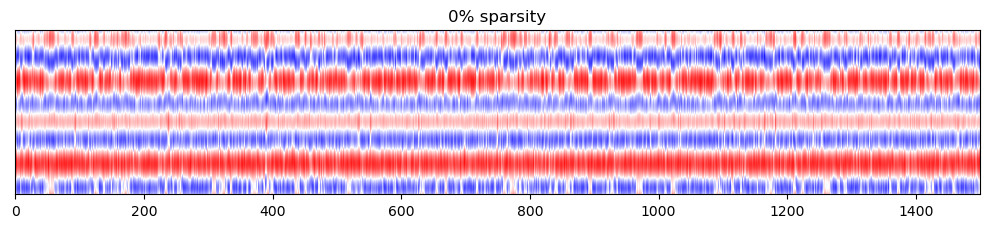

In [3]:
fig, axs = plt.subplots(len(inference_tuples), 1, figsize=(10, 3 * len(inference_tuples)))
if len(inference_tuples) == 1: axs = [axs]

for ax, (label, inference_dir) in zip(axs, inference_tuples):

    inference_files = os.listdir(inference_dir)
    inference_files.sort(key=lambda x: float(x.rsplit('.', 1)[0]))
    inference_files = [os.path.join(inference_dir, f) for f in inference_files]

    chunk_size = 500

    chunked_horizontal_means = []
    for inference_file in tqdm(inference_files):
        inference_npy = np.load(inference_file)
        horizontal_means = inference_npy[:, 0].mean(axis=2).T
        horizontal_means = horizontal_means.reshape(256, -1, chunk_size).mean(axis=-1)
        chunked_horizontal_means.append(horizontal_means)

    ax.imshow(np.concatenate(chunked_horizontal_means, axis=-1), cmap='bwr')
    ax.set_title(f'{label} sparsity')
    ax.set_yticks([])

fig.tight_layout()
plt.show()

In [ ]:
fig, axs = plt.subplots(len(inference_tuples), 1, figsize=(10, 3 * len(inference_tuples)))
if len(inference_tuples) == 1: axs = [axs]

for ax, (label, inference_dir) in zip(axs, inference_tuples):

    inference_files = os.listdir(inference_dir)
    inference_files.sort(key=lambda x: float(x.rsplit('.', 1)[0]))
    inference_files = [os.path.join(inference_dir, f) for f in inference_files]

    horizontal_means = np.concatenate([
        np.load(inference_file)[:, 0].mean(axis=2).T for inference_file in inference_files
    ], axis=-1)

    ax.imshow(horizontal_means, cmap='bwr', interpolation='nearest', aspect='auto')
    ax.set_title(f'{label}')
    ax.set_yticks([])

fig.tight_layout()
plt.show()